# Pivot de gauss avec numpy

Etape par étape, le pivote de Gauss implémenté en python puis avec numpy.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Python

In [3]:
import numpy

In [4]:
def pivot_gauss(m):
    n = m.copy()
    for i in range(1, m.shape[0]):
        j0 = i
        while j0 < m.shape[0] and m[j0, i-1] == 0:
            j0 += 1
        for j in range(j0, m.shape[0]):
            coef = - m[j, i-1] / m[i-1, i-1]
            for k in range(i-1, m.shape[1]):
                m[j, k] += coef * m[i-1, k]
    return m


m = numpy.random.rand(4, 4)
piv = pivot_gauss(m)
piv * (numpy.abs(piv) > 1e-10)

array([[0.55773852, 0.26401337, 0.36548134, 0.12568338],
       [0.        , 0.84501794, 0.3183026 , 0.11992052],
       [0.        , 0.        , 0.26876495, 0.1272863 ],
       [0.        , 0.        , 0.        , 0.3082964 ]])

`* (numpy.abs(piv) > 1e-10)` sert à simplifier l'affichage des valeurs quasi nulles.

## Numpy 1

In [5]:
def pivot_gauss2(m):
    n = m.copy()
    for i in range(1, m.shape[0]):
        j0 = i
        while j0 < m.shape[0] and m[j0, i-1] == 0:
            j0 += 1
        for j in range(j0, m.shape[0]):
            coef = - m[j, i-1] / m[i-1, i-1]
            m[j, i-1:] += m[i-1, i-1:] * coef
    return m


piv = pivot_gauss2(m)
piv * (numpy.abs(piv) > 1e-10)

array([[0.55773852, 0.26401337, 0.36548134, 0.12568338],
       [0.        , 0.84501794, 0.3183026 , 0.11992052],
       [0.        , 0.        , 0.26876495, 0.1272863 ],
       [0.        , 0.        , 0.        , 0.3082964 ]])

## Numpy 2

In [6]:
def pivot_gauss3(m):
    n = m.copy()
    for i in range(1, m.shape[0]):
        j0 = i
        while j0 < m.shape[0] and m[j0, i-1] == 0:
            j0 += 1
        coef = - m[j0:, i-1] / m[i-1, i-1]
        m[j0:, i-1:] += coef.reshape((-1, 1)) * m[i-1, i-1:].reshape((1, -1))
    return m


piv = pivot_gauss3(m)
piv * (numpy.abs(piv) > 1e-10)

array([[0.55773852, 0.26401337, 0.36548134, 0.12568338],
       [0.        , 0.84501794, 0.3183026 , 0.11992052],
       [0.        , 0.        , 0.26876495, 0.1272863 ],
       [0.        , 0.        , 0.        , 0.3082964 ]])

## Vitesse

In [7]:
from cpyquickhelper.numbers import measure_time
from tqdm import tqdm
import pandas

data = []
for n in tqdm([10, 20, 30, 40, 50, 60, 70, 80, 100]):
    m = numpy.random.rand(n, n)
    if n < 50:
        res = measure_time(lambda: pivot_gauss(m), number=10, repeat=10)
        res.update(dict(name="python", n=n))
        data.append(res)
    res = measure_time(lambda: pivot_gauss2(m), number=10, repeat=10)
    res.update(dict(name="numpy1", n=n))
    data.append(res)
    res = measure_time(lambda: pivot_gauss3(m), number=10, repeat=10)
    res.update(dict(name="numpy2", n=n))
    data.append(res)

df = pandas.DataFrame(data)
df

100%|██████████| 9/9 [00:04<00:00,  1.82it/s]


,average,deviation,min_exec,max_exec,repeat,number,ttime,context_size,name,n
0,0.000674,0.000213,0.000374,0.001088,10,10,0.006741,64,python,10
1,0.000454,0.000127,0.000256,0.000562,10,10,0.004544,64,numpy1,10
2,0.001363,0.000390,0.000780,0.001894,10,10,0.013629,64,numpy2,10
3,0.001038,0.000959,0.000658,0.003908,10,10,0.010384,64,python,20
4,0.000841,0.000280,0.000656,0.001640,10,10,0.008413,64,numpy1,20
5,0.001814,0.000280,0.001621,0.002472,10,10,0.018138,64,numpy2,20
6,0.013065,0.009250,0.007522,0.033579,10,10,0.130650,64,python,30
7,0.003207,0.000164,0.002992,0.003397,10,10,0.032071,64,numpy1,30
8,0.002815,0.000030,0.002782,0.002874,10,10,0.028153,64,numpy2,30
9,0.053362,0.020418,0.040569,0.099695,10,10,0.533620,64,python,40


In [8]:
piv = df.pivot(index="n", columns="name", values="average")
piv

name,numpy1,numpy2,python
n,,,
10,0.000454,0.001363,0.000674
20,0.000841,0.001814,0.001038
30,0.003207,0.002815,0.013065
40,0.012710,0.005585,0.053362
50,0.024682,0.007721,NaN
60,0.038531,0.009483,NaN
70,0.042429,0.011983,NaN
80,0.084926,0.015445,NaN
100,0.137455,0.025048,NaN


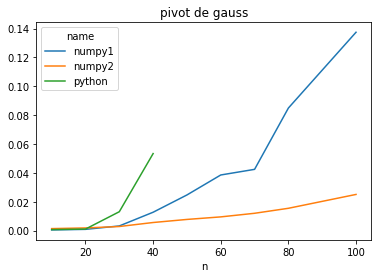

In [9]:
piv.plot(title="pivot de gauss");